# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
URL = 'https://api.hh.ru/vacancies'
jobs = ['Геодезист', 'Хореограф', 'Кинорежиссер', 'Учитель', 'Хирург']

data = {}
for job in jobs:
    parametrs = {
        'text': job,
        'area': 1,
        'page': 0,
        'per_page': 100
    }
    now = requests.get(URL, parametrs).json()
    pages = now['pages']
    data[job] = []
    for page in range(pages):
        parametrs['page'] = page
        now = requests.get(URL, parametrs).json()
        data[job].append(now)

(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
counter = 0
for info in data.values():
    counter += info[0]['found']
print(counter)

4813


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
EPS = 1e-9


class Company:
    def __init__(self, name: str, lat: [None, float], lng: [None, float]):
        self.name = name
        self.lat = lat if lat is not None else 2000.0
        self.lng = lng if lng is not None else 2000.0

    def __eq__(self, other):
        return self.name == other.name and (self.lat - other.lat) < EPS and (self.lng - other.lng) < EPS

    def get_diff(self, first: tuple[float, float], second: tuple[float, float]) -> float:
        return ((first[0] - second[0]) ** 2 + (first[1] - second[1]) ** 2) ** 0.5

    def check_in_MKAD(self):
        center = (55.755864, 37.617698)
        side = (55.758852, 37.842823)
        return self.get_diff(center, side) >= self.get_diff(center, (self.lat, self.lng))

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
companies = {}
for key in data.keys():
    companies[key] = []
    for page_info in data[key]:
        for vac in page_info['items']:
            lat, lng = None, None
            if vac['address'] is not None:
                lat, lng = vac['address']['lat'], vac['address']['lng']
            now = Company(vac['employer']['name'], lat, lng)
            if now not in companies[key]:
                companies[key].append(now)
cnt = 0
for i in companies.values():
    cnt += len(i)
print(cnt)

2180


(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
counter_with_coords = 0
for key in data.keys():
    companies[key] = []
    for page_info in data[key]:
        for vac in page_info['items']:
            if vac['address'] is not None:
                counter_with_coords += 1
print(counter_with_coords)

2611


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
in_center = {}
for key in data.keys():
    in_center[key] = []
    for page_info in data[key]:
        for vac in page_info['items']:
            if vac['address'] is not None:
                lat, lng = vac['address']['lat'], vac['address']['lng']
                now = Company(vac['employer']['name'], lat, lng)
                if now.check_in_MKAD():
                    in_center[key].append(now)
cnt = 0
for i in in_center.values():
    cnt += len(i)
print(cnt)

2009


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

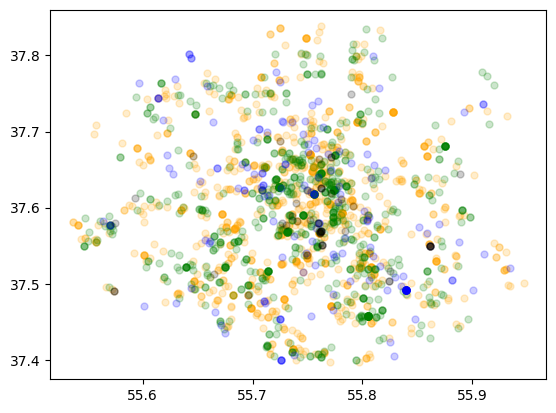

In [ ]:
  colors = ['orange', 'green', 'blue', 'black', 'red']
  for id, info in enumerate(sorted(in_center.values(), key=lambda x: len(x), reverse=True)):
      lats = []
      lngs = []
      for item in info:
          lats.append(item.lat)
          lngs.append(item.lng)
      plt.scatter(lats, lngs, c=colors[id], s=25, alpha=0.20)
  plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [ ]:
import plotly.express as px

need = []
for key in in_center.keys():
    for item in in_center[key]:
        need.append([item.lat, item.lng, key, 1])
csv_data = pd.DataFrame(need, columns=['lat', 'lng', 'color', 'size'])
fig = px.scatter_mapbox(csv_data, lat="lat", lon="lng", zoom=10, size='size', size_max=6, color='color')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

Очевидно, никто не предлагает работу (которую я ишу) в парках  других зеленых участках. Также, заметно, что учителей и хирургов в разы больше чем остальных проффесий. Ближе к центру больше вакансий (но не существенно). Также вакансии хореографов сосредоточенны в основном в центре, тогда как учителя и хирурги распределены по всей области. Вакансия кинорежиссера встречается лишь в одном экземпляре (и у нее нет адреса, так что на карте ее нет). Также, не связанное с вакансиями замечание, что графики на карте и просто на осях немного расходятся, т.к. карта "растянута" и не совсем корректно отображает расстояния.

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [ ]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 143MB/s]


Создадим DataFrame:

In [ ]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [ ]:
pd.options.display.width = None
print(diamonds[0:5])

   Unnamed: 0    cut color clarity  carat_weight cut_quality  lab   symmetry     polish eye_clean  \
0           0  Round     E    VVS2          0.09   Excellent  IGI  Very Good  Very Good   unknown   
1           1  Round     E    VVS2          0.09   Very Good  IGI  Very Good  Very Good   unknown   
2           2  Round     E    VVS2          0.09   Excellent  IGI  Very Good  Very Good   unknown   
3           3  Round     E    VVS2          0.09   Excellent  IGI  Very Good  Very Good   unknown   
4           4  Round     E    VVS2          0.09   Very Good  IGI  Very Good  Excellent   unknown   

   ... meas_depth girdle_min  girdle_max  fluor_color  fluor_intensity  \
0  ...       1.79          M           M      unknown              NaN   
1  ...       1.78        STK         STK      unknown              NaN   
2  ...       1.77         TN           M      unknown              NaN   
3  ...       1.78          M         STK      unknown              NaN   
4  ...       1.82      

(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
print(len(diamonds.values))

219703


(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
minimum = (-1, 10000000000)
maximum = (-1, -1)
for i in enumerate(diamonds.get('total_sales_price')):
    if i[1] > maximum[1]:
        maximum = i
    if i[1] < minimum[1]:
        minimum = i
print(*minimum, sep=' - ')
print(*maximum, sep=' - ')

0 - 200
219702 - 1449881


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
counter_bad = 0
for i in diamonds.values:
    for j in i:
        if j == 'unknown' or j == 'None':
            counter_bad += 1
print(counter_bad)

1746027


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
columns = set()
for i in diamonds.keys():
    for j in diamonds.get(i):
        if j == 'unknown' or j == 'None':
            columns.add(i)
            break
print(*columns, sep='\n')

fancy_color_secondary_color
culet_condition
cut_quality
girdle_min
eye_clean
fluor_intensity
fancy_color_intensity
fluor_color
color
fancy_color_overtone
girdle_max
fancy_color_dominant_color
culet_size


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
cnt = 0
for i in diamonds.keys():
    if i.startswith('fancy_color_') or i.startswith('fluor_'):
        cnt += 1
print(cnt)

6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [ ]:
cnt_not_empty = 0
for i in diamonds.keys():
    if i.startswith('fancy_color_') or i.startswith('fluor_'):
        cnt = 0
        print(i, end=': ')
        for j in diamonds.get(i):
            if j != 'unknown' and j != 'None':
                cnt += 1
        print(cnt)
        cnt_not_empty += cnt
print('Summary:', cnt_not_empty)

fluor_color: 15726
fluor_intensity: 219575
fancy_color_dominant_color: 9164
fancy_color_secondary_color: 1062
fancy_color_overtone: 2038
fancy_color_intensity: 9162
Summary: 256727


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
print(len(diamonds.keys()))
for i in diamonds.keys():
    if i.startswith('fancy_color_') or i.startswith('fluor_'):
        diamonds.drop(i, axis=1, inplace=True)
print(len(diamonds.keys()))

26
20


(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
cnt = 0
for i in diamonds.keys():
    if i.startswith('culet_'):
        cnt += 1
print(cnt)

cnt_not_empty = 0
for i in diamonds.keys():
    if i.startswith('culet_'):
        cnt = 0
        print(i, end=': ')
        for j in diamonds.get(i):
            if j != 'unknown' and j != 'None':
                cnt += 1
        print(cnt)
        cnt_not_empty += cnt
print('Summary:', cnt_not_empty)

print(len(diamonds.keys()))
for i in diamonds.keys():
    if i.startswith('culet_'):
        diamonds.drop(i, axis=1, inplace=True)
print(len(diamonds.keys()))

2
culet_size: 133963
culet_condition: 15319
Summary: 149282
20
18


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
dollars = 0
for k in diamonds.get('total_sales_price'):
    dollars += k
print("Summary price: ", "{:,}".format(dollars), '$', sep='')

Summary price: 1,517,721,991$


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
print(diamonds[::2])

        Unnamed: 0    cut    color clarity  carat_weight cut_quality  lab   symmetry     polish  \
0                0  Round        E    VVS2          0.09   Excellent  IGI  Very Good  Very Good   
2                2  Round        E    VVS2          0.09   Excellent  IGI  Very Good  Very Good   
4                4  Round        E    VVS2          0.09   Very Good  IGI  Very Good  Excellent   
6                6  Round        E    VVS2          0.09   Very Good  IGI  Very Good  Very Good   
8                8  Round        E    VVS2          0.09   Very Good  IGI  Very Good  Very Good   
...            ...    ...      ...     ...           ...         ...  ...        ...        ...   
219694      219695  Round        D      IF         12.52   Excellent  HRD  Excellent  Excellent   
219696      219697   Oval        H     VS2         18.88     unknown  GIA  Excellent  Excellent   
219698      219699  Round        E     VS1         10.65   Excellent  GIA  Excellent  Excellent   
219700    

(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
print(diamonds[::6])

        Unnamed: 0      cut    color clarity  carat_weight cut_quality  lab   symmetry     polish  \
0                0    Round        E    VVS2          0.09   Excellent  IGI  Very Good  Very Good   
6                6    Round        E    VVS2          0.09   Very Good  IGI  Very Good  Very Good   
12              12    Round        E    VVS2          0.09   Very Good  IGI  Very Good  Very Good   
18              18    Round        E    VVS2          0.09   Excellent  IGI  Very Good  Very Good   
24              24    Round        L      I1          0.34   Excellent  IGI  Excellent  Excellent   
...            ...      ...      ...     ...           ...         ...  ...        ...        ...   
219678      219679    Round        G     VS1         10.23   Excellent  GIA  Excellent  Excellent   
219684      219685  Radiant  unknown      I1          0.89     unknown  GIA       Good       Good   
219690      219691    Round        D    VVS2         10.10   Excellent  GIA  Excellent  Exc

(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
print(diamonds.select_dtypes(exclude=["number","bool_"]))

             cut    color clarity cut_quality  lab   symmetry     polish eye_clean girdle_min  \
0          Round        E    VVS2   Excellent  IGI  Very Good  Very Good   unknown          M   
1          Round        E    VVS2   Very Good  IGI  Very Good  Very Good   unknown        STK   
2          Round        E    VVS2   Excellent  IGI  Very Good  Very Good   unknown         TN   
3          Round        E    VVS2   Excellent  IGI  Very Good  Very Good   unknown          M   
4          Round        E    VVS2   Very Good  IGI  Very Good  Excellent   unknown        STK   
...          ...      ...     ...         ...  ...        ...        ...       ...        ...   
219698     Round        E     VS1   Excellent  GIA  Excellent  Excellent   unknown          M   
219699   Radiant  unknown     VS2     unknown  GIA  Very Good  Very Good   unknown         TK   
219700     Round        E     VS1   Excellent  GIA  Excellent  Excellent   unknown         TN   
219701  Princess  unknown     

>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [33]:
arr = [i for i in diamonds.get('total_sales_price')]
res = sum([i*i for i in arr])
print("{:,}".format(res))

158,540,672,665,477


### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

In [34]:
fig = px.bar(diamonds[diamonds.color != 'unknown'], y="total_sales_price", x="color", barmode="group")
fig.show()
fig = px.scatter(diamonds[diamonds.color != 'unknown'], y="total_sales_price", x="color")
fig.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

In [35]:
count = {}
for i in diamonds.get('lab'):
    count[i] = count.get(i, 0) + 1
fig = px.bar(pd.DataFrame([[i, count[i]] for i in count.keys()], columns=['lab', 'number']), x="lab", y="number")
fig.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

In [36]:
fig = px.scatter(diamonds, y="total_sales_price", x="carat_weight")
fig.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

In [40]:
count = {}
for i in diamonds.get('cut_quality'):
    if i != 'unknown':
        count[i] = count.get(i, 0) + 1
fig = px.bar(pd.DataFrame([[i, count[i]] for i in count.keys()], columns=['cut_quality', 'number']), x="cut_quality", y="number")
fig.show()

(2 балла) **Сделайте выводы по построенным графикам:**

1. Независимо от цвета, бриллиантов дешевле больше чем тех, что дороже. Бриллианты цвета G стоят дороже остальных, дальше идут D,H, затем E,F и дальше I>J>K>L>M.

2. Бриллиантов с оценкой GIA в разы больше чем остальных. HRD - меньше всего (порядка 200к против 3.5к).

3. В основном есть корреляция вес-цена, но отдальные экземпляры могут выбиваться из нее (легкий и дорогой или наоборот). Также больше бриллиантов которые легче и дешевле. Также есть некоторый диапазон цен, в котором по некоторой причине нет ни одного бриллианта.

4. Больше всего бриллиантов качества Excellent(124k), дальше Very Good(34k), а остального качеста крайне мало (в сравнении): Good - 28, Fair - 5, Ideal - 1. Также, вне графика можно заметить что много бриллиантов с неизвестным качеством.


>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [41]:
diamonds = diamonds[["meas_length","meas_width", "meas_depth", "total_sales_price"]]
print(diamonds[:10])

   meas_length  meas_width  meas_depth  total_sales_price
0         2.85        2.87        1.79                200
1         2.84        2.89        1.78                200
2         2.88        2.90        1.77                200
3         2.86        2.88        1.78                200
4         2.79        2.83        1.82                200
5         2.95        2.99        1.81                200
6         2.85        2.88        1.84                200
7         2.86        2.89        1.78                200
8         2.89        2.92        1.85                200
9         2.83        2.87        1.80                200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [44]:
print(diamonds.sample(frac=1))

        meas_length  meas_width  meas_depth  total_sales_price
10134          3.72        3.75        2.23                632
20648          4.33        4.36        2.72                736
53880          4.69        4.73        2.93                952
53945          4.32        4.33        2.57                952
168582         5.74        5.78        3.54               6119
...             ...         ...         ...                ...
218372         9.16        8.99        5.96              62099
7696           3.75        3.77        2.22                616
213027         9.10        9.18        5.73              35759
71898          4.97        4.98        3.18               1096
116451         4.88        4.92        3.08               2160

[219703 rows x 4 columns]


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [46]:
sum_mink = []
for i in diamonds[["meas_length","meas_width", "meas_depth"]].values:
    now = 0
    for j in i:
        now += j ** 3
    now **= 1/3
    sum_mink.append([now])
df = pd.DataFrame(sum_mink, columns=['sum_mink'])
print(df)

         sum_mink
0        5.687043
1        7.575063
2        9.876004
3        5.893362
4        5.046722
...           ...
219698  10.117141
219699   6.749188
219700   6.764480
219701   8.352608
219702   5.743186

[219703 rows x 1 columns]


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [48]:
new_data = pd.concat([df, diamonds['total_sales_price']], axis=1).sample(frac=1)
print(new_data)

         sum_mink  total_sales_price
97423    5.785387               1554
73285    5.704878               1080
46690    5.559268                902
55508    5.601185                966
106722  13.351412               1846
...           ...                ...
31993    8.390829                838
175468   9.531163               6864
203590   5.471275              17456
51168    4.706940                936
36428    6.126002                846

[219703 rows x 2 columns]


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [49]:
border = len(new_data) // 10 * 8
training = new_data[:border]
testing = new_data[border:]
print(training)
print(testing)

         sum_mink  total_sales_price
97423    5.785387               1554
73285    5.704878               1080
46690    5.559268                902
55508    5.601185                966
106722  13.351412               1846
...           ...                ...
16262    8.158303                708
17492    5.572262                692
158468   5.146168               4306
154254   5.214051               3991
146350   8.249917               3616

[175760 rows x 2 columns]
         sum_mink  total_sales_price
30036    6.612571                788
218324   7.469232              61525
215742   5.584935              43097
38623   10.149408                854
527      7.019992                376
...           ...                ...
31993    8.390829                838
175468   9.531163               6864
203590   5.471275              17456
51168    4.706940                936
36428    6.126002                846

[43943 rows x 2 columns]


(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

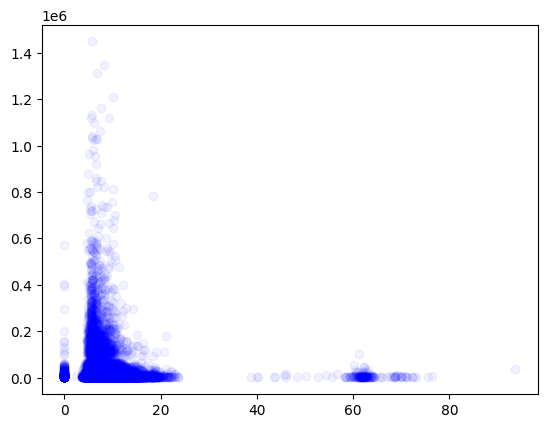

In [56]:
graph = plt
graph.scatter(training['sum_mink'], training['total_sales_price'], alpha=0.05, c='blue')
graph.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

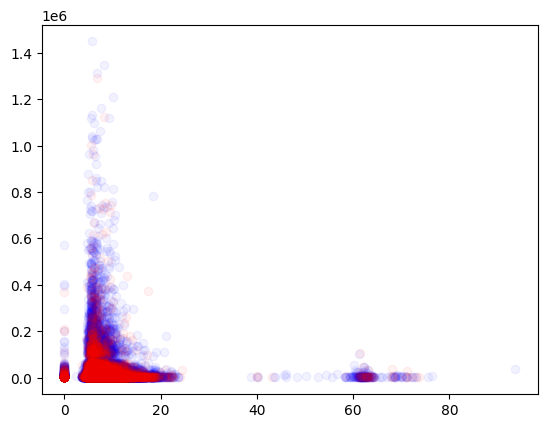

In [57]:
graph.scatter(training['sum_mink'], training['total_sales_price'], alpha=0.05, c='blue')
graph.scatter(testing['sum_mink'], testing['total_sales_price'], alpha=0.05, c='red')
graph.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
# your code here

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
# your code here

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)